# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, how = "outer", on = ["Mouse ID"])
# Display the data table for preview

merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [37]:
# Checking the number of mice.
merged_data["Mouse ID"].unique().size

249

In [38]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_data = merged_data.loc[merged_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
dup_data

array(['g989'], dtype=object)

In [39]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_data = merged_data.loc[merged_data["Mouse ID"] == "g989",:]
dup_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [40]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data.loc[merged_data["Mouse ID"] != "g989",:]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [41]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].unique().size


248

## Summary Statistics

In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_data = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).mean()
median_data = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).median()
var_data = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).var()
std_data = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).std()
sem_data = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).sem()

summary_data = pd.DataFrame({"Mean Tumor Volume": mean_data,
                             "Median Tumor Volume": median_data,
                             "Tumor Volume Variance": var_data,
                             "Tumor Volume Std. Dev.": std_data,
                             "Tumor Volume Std. Err.": sem_data
                            })

summary_data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_agg = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Total Number of Mice per Treatment')

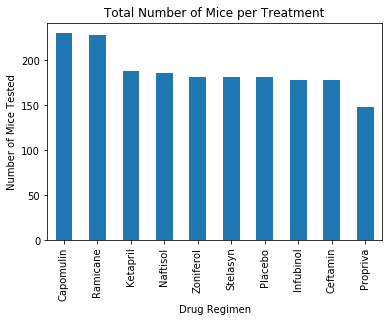

In [44]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_mice = clean_data["Drug Regimen"].value_counts()
total_mice.plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Total Number of Mice per Treatment")

In [45]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



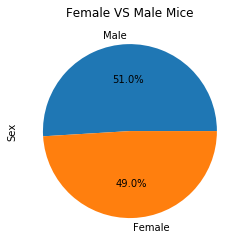

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = clean_data["Sex"].value_counts()
mice_gender.plot.pie(autopct = "%1.1f%%", title = "Female VS Male Mice")

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [48]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
greatest_tp = clean_data.groupby(["Mouse ID"])["Timepoint"].max()
greatest_df = pd.DataFrame(greatest_tp)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_data, greatest_df, on=("Mouse ID","Timepoint"), how = "right")
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [95]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin"," Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
cap_vol = []
ram_vol = []
inf_vol = []
cef_vol = []


    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in merged_df.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        cap_vol.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == "Ramicane":
        ram_vol.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == "Infubinol":
        inf_vol.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == "Ceftamin":
        cef_vol.append(row['Tumor Volume (mm3)'])
        
drugs_vol = pd.DataFrame ({"Capomulin": cap_vol,
                         "Ramicane": ram_vol,
                         "Infubinol": inf_vol,
                         "Ceftamin" : cef_vol
                        })
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
tumor_volume_dfs = {
    "Capomulin": pd.DataFrame({"Capomulin": cap_vol}), 
    "Ramicane": pd.DataFrame({"Ramicane": ram_vol}), 
    "Infubinol": pd.DataFrame({"Infubinol": inf_vol}), 
    "Ceftamin": pd.DataFrame({"Ceftamin": cef_vol})
    } 

    
    # add subset 

    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Determine outliers using upper and lower bounds

outliers = {}

for drug in treaments:
    drug_df = tumor_volume_dfs[drug]
    quartiles = drug_df.quantile([.25,.5,.75])
    # quartiles 
    lowerq = quartiles[drug][0.25]
    upperq = quartiles[drug][0.75]
    iqr = upperq - lowerq
    # calculate bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers[drug + "_max"] = drug_df[drug_df[drug] > upper_bound]
    outliers[drug + "_min"] = drug_df[drug_df[drug] < lower_bound]
    


KeyError: ' Ramicane'

Text(0.5, 1.0, 'The Distrubution of the Tumor Volume for Each Treatment')

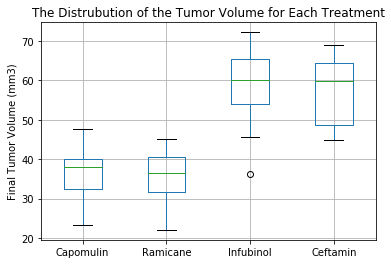

In [94]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
drugs_vol.boxplot()
plt.ylabel("Final Tumor Volume (mm3)")
plt.title ("The Distrubution of the Tumor Volume for Each Treatment")


## Line and Scatter Plots

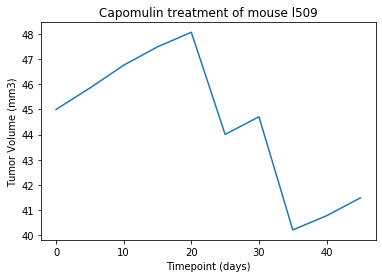

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [92]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


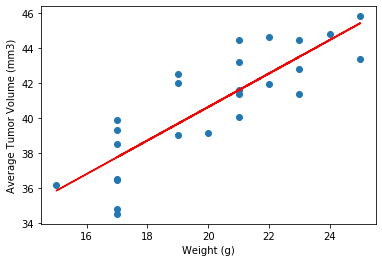

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

